# Station Area Ethnicity 

In [1]:
import pandas as pd

# for spatial data
import geopandas as gpd

# for plotting
import matplotlib.pyplot as plt
import matplotlib.cm as cm, matplotlib.font_manager as fm

# for basemaps
import contextily as ctx

import folium
from folium.plugins import MarkerCluster
import pandas as pd

import plotly.express as px

/opt/conda/lib/python3.9/site-packages/geopandas/_compat.py:106: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


In [18]:
stationarea=gpd.read_file("stationarea.geojson")
station=gpd.read_file("stations.geojson")
ethdf=gpd.read_file("ethnicityindex.geojson")
index=gpd.read_file("iqv_average.csv")
stationarea['lon']=station.geometry.x
stationarea['lat']=station.geometry.y
tod=stationarea[stationarea['TOD']=='Yes']
ntod=stationarea[stationarea['TOD']=='No']
title_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=15, weight='normal', stretch='normal')
label_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=12, weight='normal', stretch='normal')
ticks_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=10, weight='normal', stretch='normal')


In [3]:
ethnover=ethdf[['GEOID_left',
 'NAME_left','iqv_2019_sq',
 'iqv_2013_sq',
 'geometry']]
ethnover['index_change']=((ethnover['iqv_2019_sq']-ethnover['iqv_2013_sq'])/ethnover['iqv_2013_sq'])*100
ethnover.head()


/opt/conda/lib/python3.9/site-packages/geopandas/geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


GEOID_left                   NAME_left  iqv_2019_sq  iqv_2013_sq  \
0  060014001001  Block Group 1, Alameda, CA     0.487542     0.611353   
1  060014002001  Block Group 1, Alameda, CA     0.448085     0.611353   
2  060014002002  Block Group 2, Alameda, CA     0.549006     0.611353   
3  060014003001  Block Group 1, Alameda, CA     0.588805     0.611353   
4  060014042001  Block Group 1, Alameda, CA     0.520958     0.611353   

                                            geometry  index_change  
0  MULTIPOLYGON (((-122.24692 37.88544, -122.2466...    -20.251986  
1  MULTIPOLYGON (((-122.25508 37.84607, -122.2542...    -26.706052  
2  MULTIPOLYGON (((-122.25792 37.84261, -122.2577...    -10.198229  
3  MULTIPOLYGON (((-122.25186 37.84475, -122.2517...     -3.688266  
4  MULTIPOLYGON (((-122.23661 37.84110, -122.2364...    -14.786057

In [4]:
ethdf_wb = ethnover.to_crs(epsg=3857)
stadf_wb = stationarea.to_crs(epsg=3857)
tod_wb = tod.to_crs(epsg=3857)
ntod_wb = ntod.to_crs(epsg=3857)
minx, miny, maxx, maxy = ethdf_wb.geometry.total_bounds

/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:860: RuntimeWarning: invalid value encountered in subtract
  css = yc - yc.mean()
/opt/conda/lib/python3.9/site-packages/mapclassify/classifiers.py:891: RuntimeWarning: invalid value encountered in double_scalars
  gadf = 1 - self.adcm / adam


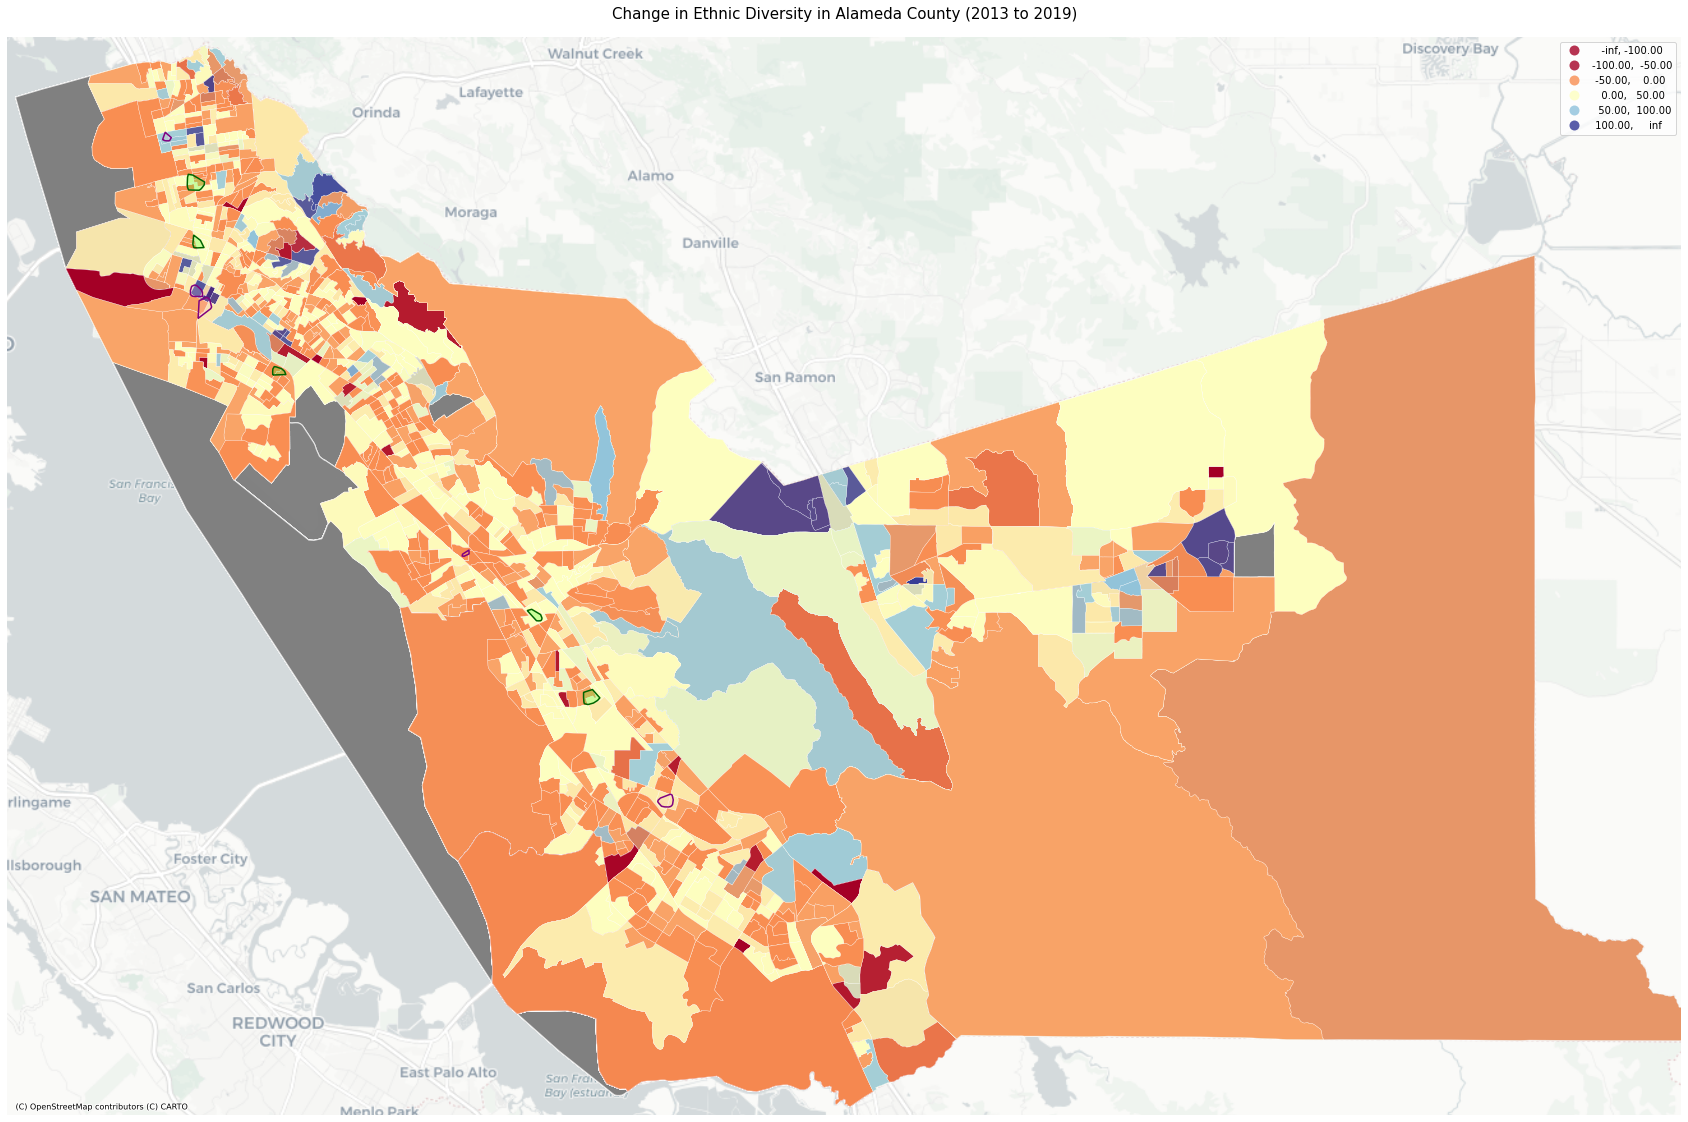

In [47]:
fig, ax = plt.subplots(figsize=(30,40))

# block groups
ethdf_wb.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)

ethdf_wb.plot(ax=ax,
                  column = ethdf_wb['index_change'],
                  cmap='RdYlBu',  
                  edgecolor='white',
                  alpha=0.8,
                  linewidth=0.3,
                  scheme='user_defined',
                  classification_kwds={'bins':[-100,-50,0,50,100]},
                  legend=True,
              #legend_kwds={'label':"Diversity Index"}
                 )

tod_wb.boundary.plot(ax=ax,
                     color='darkgreen',
                     label = ntod['Station'])
tod_wb.plot(ax=ax,
            color='lime',
            alpha=0.2,
            label = ntod['Station'])

ntod_wb.boundary.plot(ax=ax,
                     color='purple',
                     label = ntod['Station'])
ntod_wb.plot(ax=ax,
            color='pink',
            alpha=0.2,
            label = ntod['Station'])

ax.set_xlim(minx - 500, maxx - 1000) 
ax.set_ylim(miny - 500, maxy + 500)
ax.axis('off')
ax.set_title("Change in Ethnic Diversity in Alameda County (2013 to 2019)",fontsize=15,pad=18)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [49]:

import base64
from io import BytesIO
tmpfile = BytesIO()
fig.savefig(tmpfile, format='png')
encoded = base64.b64encode(tmpfile.getvalue()).decode('utf-8')

html = 'Some html head' + '<img src=\'data:image/png;base64,{}\'>'.format(encoded) + 'Some more html'

with open('htmls/ethnicchange_choropleth_withstation.html','w') as f:
    f.write(html)
fig.savefig("htmls/ethnicchange_choropleth_withstation.png", dpi=100, bbox_inches='tight')
plt.show()

In [ ]:
for i, row in tod_wb.iterrows():
    plt.annotate(row['Station'],
                 xy=(row['lon'], row['lat']),
                 xytext=(row['lon'] + 0.5, row['lat'] - 1),
                 fontproperties=annotation_font,
                 bbox=dict(boxstyle='round', color='gray', fc='w', alpha=0.9),
                 xycoords='data')



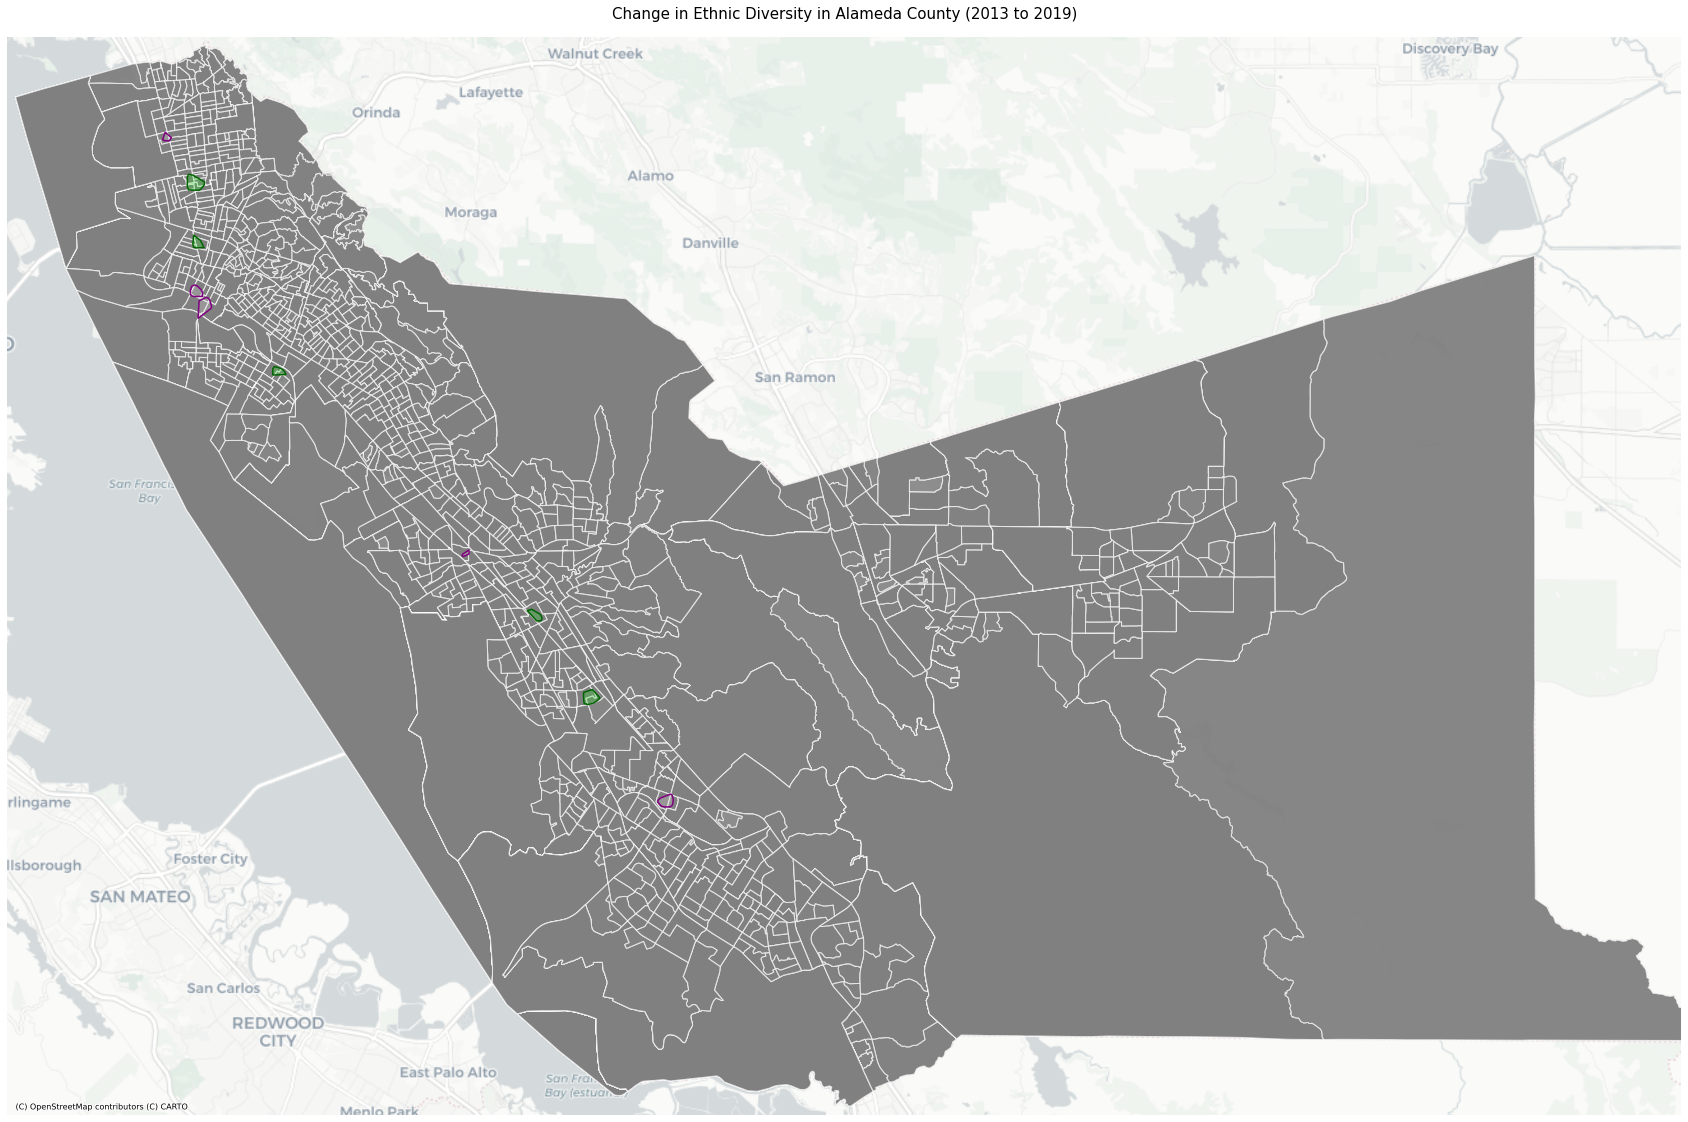

In [ ]:
fig, ax = plt.subplots(figsize=(30,40))

# block groups
ethdf_wb.plot(ax=ax, # this puts it in the ax plot
        color='gray', 
        edgecolor='white',
        alpha=0.5)

tod_wb.boundary.plot(ax=ax,
                     color='darkgreen',
                     label = ntod['Station'])
tod_wb.plot(ax=ax,
            color='lime',
            alpha=0.2,
            label = ntod['Station'])

ntod_wb.boundary.plot(ax=ax,
                     color='purple',
                     label = ntod['Station'])
ntod_wb.plot(ax=ax,
            color='lavenderblush',
            alpha=0.2,
            label = ntod['Station'])

for i, row in ntod_wb.iterrows():
    plt.annotate(row['Station'],
                 xy=(row['lon'], row['lat']),
                 xytext=(row['lon'] + 0.5, row['lat'] - 1),
                 fontproperties=annotation_font,
                 xycoords='data')

ax.set_xlim(minx - 500, maxx - 1000) 
ax.set_ylim(miny - 500, maxy + 500)
ax.axis('off')
ax.set_title("Change in Ethnic Diversity in Alameda County (2013 to 2019)",fontsize=15,pad=18)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [ ]:
edgecolor='darkgreen',
         alpha=0.2,

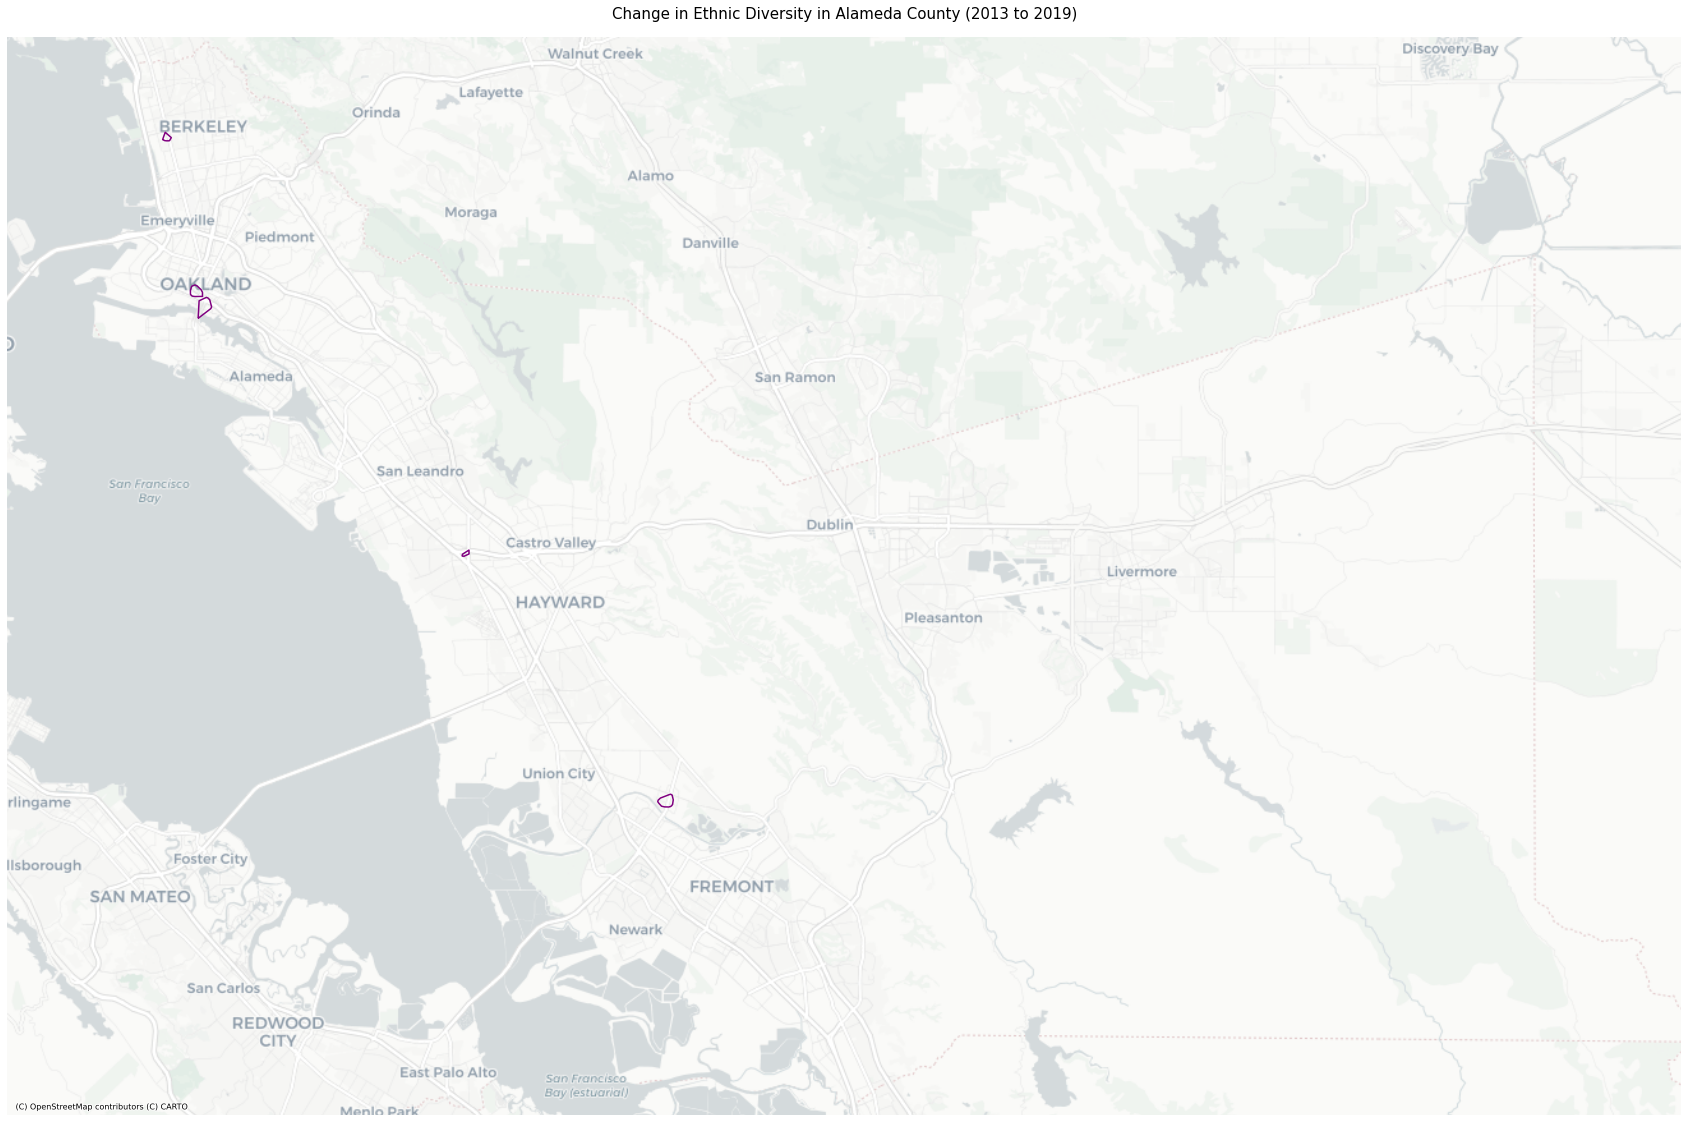

In [38]:
annotation_font = fm.FontProperties(family='Bitstream Vera Sans', style='normal', size=15, weight='normal', stretch='normal')
 
fig, ax = plt.subplots(figsize=(30,40))

# block groups
ntod_wb.boundary.plot(ax=ax,
                     color='purple',
                     label = ntod['Station'])

plt.annotate('x',xy=(-122.267120, 37.828705))

ax.set_xlim(minx - 500, maxx - 1000) 
ax.set_ylim(miny - 500, maxy + 500)
ax.axis('off')
ax.set_title("Change in Ethnic Diversity in Alameda County (2013 to 2019)",fontsize=15,pad=18)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

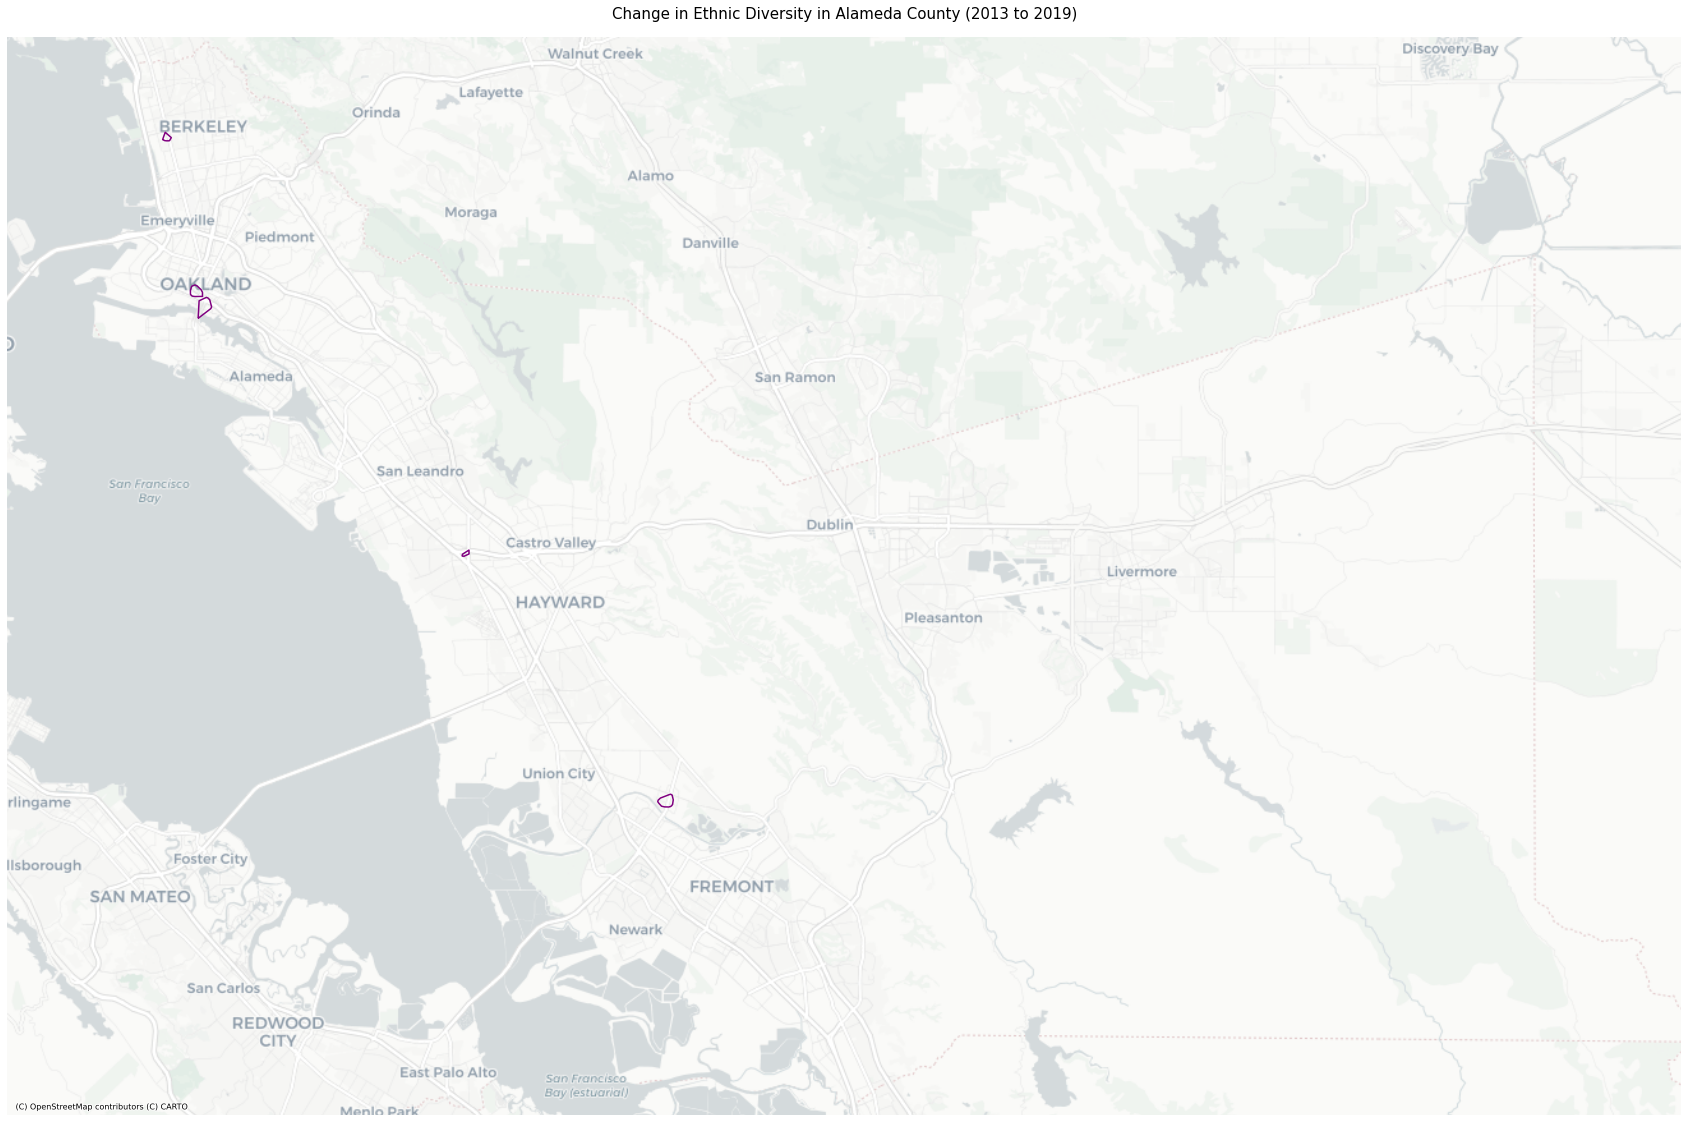

In [68]:
fig, ax = plt.subplots(figsize=(30,40))

# block groups
ntod_wb.boundary.plot(ax=ax,
                     color='purple',
                     label = ntod['Station'])

ax.annotate('xyz',xy=(-122.283348, 37.874061),font='Arial',color='red',fontsize='24',xycoords='data',ha= 'center')
plt.annotate('xxyz',xy=(-122.017151, 37.590865),font='Arial',color='red',fontsize='14')
plt.annotate('xxyz',xy=(-122.127060, 37.697566),font='Arial',color='red',fontsize='14')

ax.axis('off')
ax.set_xlim(minx - 500, maxx - 1000) 
ax.set_ylim(miny - 500, maxy + 500)


ax.set_title("Change in Ethnic Diversity in Alameda County (2013 to 2019)",fontsize=15 ,pad=18)

# add a basemap
ctx.add_basemap(ax,source=ctx.providers.CartoDB.Positron)

In [55]:
ntod_wb

Station         City Code TOD County Marker  \
5       NORTH BERKELEY     Berkeley  BKY  No    ALA      o   
6  19TH STREET/OAKLAND      Oakland  OAK  No    ALA      o   
7             BAY FAIR  San Leandro  SAN  No    ALA      o   
8           UNION CITY   Union City  UNC  No    ALA      o   
9         LAKE MERRITT      Oakland  OAK  No    ALA      o   

                                      buffer_polygon  \
5  POLYGON ((562158.4961938841 4191096.300319521,...   
6  POLYGON ((563608.8389169731 4183769.339677225,...   
7  POLYGON ((576458.9770771035 4171618.447772438,...   
8  POLYGON ((586339.0999929304 4159876.292845242,...   
9  POLYGON ((563781.1147714683 4182741.967714277,...   

                                            geometry         lon        lat  
5  POLYGON ((-13613629.976 4560403.292, -13613779... -122.283348  37.874061  
6  POLYGON ((-13611866.286 4551082.083, -13612016... -122.268387  37.808075  
7  POLYGON ((-13595761.662 4535527.370, -13595842... -122.127060  37.697566  
8  POLYGON ((-13583443.270 4520528.644, -13583735... -122.017151  37.590865  
9  POLYGON ((-13611658.530 4549776.026, -13611600... -122.265541  37.797679